In [15]:
import pandas as pd
import matplotlib.pyplot as plt
#import graphviz 
import numpy as np
from scipy import stats 
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import tensorflow as tf
from sklearn import preprocessing
import warnings
warnings.filterwarnings('ignore')

# Preprocesado

In [2]:
#Cargamos las bases de datos

db_displasia = pd.read_excel('SMD.xls')
db_hepatopata = pd.read_excel('Hepatopata.xls')
db_oncologicos = pd.read_excel('Oncologicos.xls')
db_PTI = pd.read_excel('PTI.xls')

In [3]:
#Reduccion de dimensionalidad (Preprocesamiento y limpieza de datos)
db_smd = db_displasia.drop(['PLTI','PLTF','PLTO','MNEU','MLIN','MMON','MBAS','MEOS','MCAS','MMET','MMIE','MPRO','CPLAS','MBLS','MERI','FRSP','COMHE','AVSBL','AVSPL','AVSRJ','AVNRB','ESSYS','WBC-P','IPFA','IPF','HIPF','VPM','RDW','NEUp','LINp','MONp','EOSp','BASp','IGp','ERBLp','RET','RETp','FRI','RETHE','HIPER','HYPO','MACR','MICRO','FRAGM','RBCO','MCHCO','BA-D%','BA-N%','D-HE','FRCA','IRF-Y','LIN_p','NEU_p','RBCHE','RBC-Y','RTNC','RUPP','RET-Y','RPI','TNC-D','TNC-P'],axis=1)

#Añadimos una nueva variable que identifique la patologia
db_smd['Diagnosis']=np.zeros((417,1),dtype=np.int8)

db_hpt = db_hepatopata.drop(['WBC-P','IPFA','IPF','HIPF','VPM','RDW','NEUp','LINp','MONp','EOSp','BASp','IGp','ERBLp','RET','RETp','FRI','RETHE','HIPER','HYPO','MACR','MICRO','FRAGM','RBCO','MCHCO','BA-D%','BA-N%','D-HE','FRCA','IRF-Y','LIN_p','NEU_p','RBCHE','RBC-Y','RTNC','RUPP','RET-Y','RPI','TNC-D','TNC-P'],axis=1)

#Añadimos una variable que identifique el diagnostico
db_hpt['Diagnosis']=np.ones((342,1),dtype=np.int8)

db_onc = db_oncologicos.drop(['WBC-P','IPFA','IPF','HIPF','VPM','RDW','NEUp','LINp','MONp','EOSp','BASp','IGp','ERBLp','RET','RETp','FRI','RETHE','HIPER','HYPO','MACR','MICRO','FRAGM','RBCO','MCHCO','BA-D%','BA-N%','D-HE','FRCA','IRF-Y','LIN_p','NEU_p','RBCHE','RBC-Y','RTNC','RUPP','RET-Y','RPI','TNC-D','TNC-P'],axis=1)

#Añadimos una variable que identifique el diagnostico
db_onc['Diagnosis']=np.full((303,1),2)

#Reduccion de dimensionalidad (Preprocesamiento y limpieza de datos)
db_pti = db_PTI.drop(['PLTI','PLTF','PLTO','MNEU','MLIN','MMON','MBAS','MEOS','MCAS','MMET','MMIE','MPRO','CPLAS','MBLS','MERI','FRSP','COMHE','AVSBL','AVSPL','AVSRJ','AVNRB','ESSYS','WBC-P','IPFA','IPF','HIPF','VPM','RDW','NEUp','LINp','MONp','EOSp','BASp','IGp','ERBLp','RET','RETp','FRI','RETHE','HIPER','HYPO','MACR','MICRO','FRAGM','RBCO','MCHCO','BA-D%','BA-N%','D-HE','FRCA','IRF-Y','LIN_p','NEU_p','RBCHE','RBC-Y','RTNC','RUPP','RET-Y','RPI','TNC-D','TNC-P'],axis=1)

#Añadimos una variable que identifique el diagnostico
db_pti['Diagnosis']=np.full((201,1),3)

db_smd_hpt = pd.concat([db_smd,db_hpt,db_onc,db_pti])
db_smd_hpt = db_smd_hpt.replace(np.nan ,np.mean(db_smd_hpt['PLT']))


In [4]:
db_smd_hpt.head()

,LEU,NEU,LIN,MON,EOS,BAS,IG,ERIT,HGB,HCT,...,NESFL,NESSC,NEU_a,NE-WX,NE-WY,NE-WZ,TNC-N,WBC-D,WBC-N,Diagnosis
0,4.54,2.66,1.07,0.36,0.39,0.04,0.02,3.76,11.8,36.6,...,47.7,153.2,2.66,333,586,712,4.54,4.46,4.54,0
1,3.82,1.74,1.43,0.37,0.24,0.02,0.02,3.24,10.4,31.9,...,47.7,154.6,1.74,349,587,561,3.82,3.99,3.82,0
2,10.69,5.71,0.85,3.75,0.01,0.03,0.34,2.81,11.7,33.8,...,52.0,149.4,5.71,368,653,603,10.75,11.00,10.69,0
3,2.92,1.27,1.07,0.39,0.05,0.10,0.04,4.52,15.7,45.9,...,49.5,153.7,1.27,338,747,717,2.92,2.86,2.92,0
4,1.18,0.51,0.58,0.05,0.00,0.02,0.02,2.83,9.7,27.0,...,68.0,148.1,0.51,581,1058,804,1.19,1.09,1.18,0


In [5]:
db_smd_hpt['Diagnosis'].value_counts()

0    417
1    342
2    303
3    201
Name: Diagnosis, dtype: int64

# Conjuntos de Train y Test

In [6]:
#Realizamos las particiones de entrenamiento y test

x = db_smd_hpt.drop(['Diagnosis'],axis=1)
y = db_smd_hpt['Diagnosis']
y_vals = np.eye(len(set(y)))[y]

x_train,x_test,y_train,y_test = train_test_split(x,y_vals, test_size=0.2)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1010, 49)
(253, 49)
(1010, 4)
(253, 4)


# Estandarización

In [7]:
scaler = preprocessing.StandardScaler().fit(x_train)

x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)
print(x_train.shape)

(1010, 49)


# Crear modelo

In [8]:
x = tf.placeholder(tf.float32, [None, 49])
y_true = tf.placeholder(tf.float32, [None, 4])
y_true_cls = tf.placeholder(tf.int64, [None])
w = tf.Variable(tf.zeros([49, 4]))
b = tf.Variable(tf.zeros([4]))
logits = tf.matmul(x, w) + b
y_pred = tf.nn.softmax(logits)
y_pred_cls = tf.argmax(y_pred, axis=1) #axis=dimension
y_test_cls = np.array([label.argmax() for label in y_test])

In [9]:
cross_entropy = tf.nn.softmax_cross_entropy_with_logits_v2(logits=logits,labels=y_true)
#cost = tf.reduce_mean(cross_entropy)
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001).minimize(cross_entropy)
correct_prediction = tf.equal(y_pred_cls, y_true_cls)
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))


# Entrenamiento

In [10]:
session = tf.Session()
session.run(tf.global_variables_initializer())
def optimize(num_iterations):
    for i in range(num_iterations):
        
        feed_dict_train = {x: x_train, y_true: y_train}

        session.run(optimizer, feed_dict=feed_dict_train)


# Test

In [13]:
classes = ['SMD','Hepatópatas','Oncológicos','PTI']

feed_dict_test = {x: x_test,
                  y_true: y_test,
                  y_true_cls: y_test_cls}

def print_accuracy():
    # Use TensorFlow to compute the accuracy.
    acc = session.run(accuracy, feed_dict=feed_dict_test)

    # Print the accuracy.
    print("Accuracy on test-set: {0:.1%}".format(acc))

def plot_confusion_matrix(normalize=False):

    # Compute confusion matrix
    # Only use the labels that appear in the data
    #classes = classes[unique_labels(y_true, y_pred)]
    
    # Get the true classifications for the test-set.
    cls_true = y_test_cls

    # Get the predicted classifications for the test-set.
    cls_pred = session.run(y_pred_cls, feed_dict=feed_dict_test)

    # Get the confusion matrix using sklearn.
    cm = confusion_matrix(y_true=cls_true,
                          y_pred=cls_pred)

    # Print the confusion matrix as text.
    print(cm)
    
    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title='Matriz de confusión',
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


[[70  0  5  5]
 [ 7 55  9  4]
 [11  7 41  2]
 [ 1  3  7 26]]
Accuracy on test-set: 75.9%


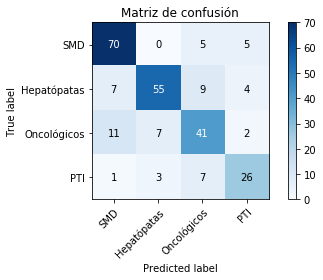

In [14]:
optimize(num_iterations=1000)
plot_confusion_matrix()
print_accuracy()
